In [1]:
import numpy as np
import matplotlib
import pylab as plt

import sys
sys.path.append('../')

import hallgerd
from hallgerd.core import Sequential, cross_entropy_delta
from hallgerd.layers import Dense

In [2]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [3]:
X, y = make_classification(n_samples=1000, n_features=30, n_informative=30,
                           n_redundant=0,
                           n_classes=5)
# y = y[:,np.newaxis]
y = OneHotEncoder(sparse=False, categories='auto').fit_transform(y.reshape((-1,1)))
X = StandardScaler().fit_transform(X)
y = y.T
X = X.T

In [4]:
X.shape, y.shape

((30, 1000), (5, 1000))

In [5]:
model = Sequential(lr=1e-2, batch_size=256, epochs=40, loss='cross_entropy')
model.add(Dense(30, 30, activation='relu'))
model.add(Dense(30, 5, activation='softmax'))
model.fit(X, y)

100%|██████████| 40/40 [00:01<00:00, 31.84it/s]


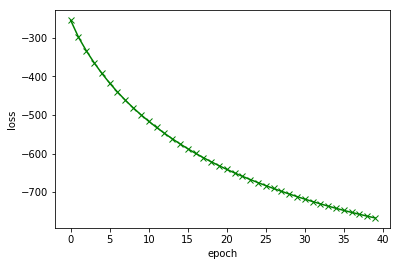

In [6]:
plt.plot(model.history['loss'], 'gx-')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [7]:
yt = y.argmax(axis=0)
ypp = model(X)
yp = ypp.argmax(axis=0)

In [8]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       202
           1       0.94      0.93      0.93       201
           2       0.92      0.95      0.93       201
           3       0.91      0.88      0.90       200
           4       0.93      0.91      0.92       196

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.92      0.92      0.92      1000

